In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import theano
import tensorflow
import keras

print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('pydot ' + pydot.__version__)
print('h5py ' + h5py.__version__)

print('theano ' + theano.__version__)
print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)


scipy 1.1.0
numpy 1.15.2
matplotlib 3.0.0
pandas 0.23.4
sklearn 0.20.0
pydot 1.2.4
h5py 2.8.0
theano 1.0.3
tensorflow 1.11.0
keras 2.2.4


Using TensorFlow backend.


In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))


11493376/11490434 [==============================] - 5s 0us/step
Epoch 1/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.6667 - acc: 0.8290
Epoch 2/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.3470 - acc: 0.9033
Epoch 3/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.2999 - acc: 0.9151
Epoch 4/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.2708 - acc: 0.9238
Epoch 5/5
10000/10000 [==============================] - 0s 11us/step
loss_and_metrics : [0.23031035204529762, 0.9345]


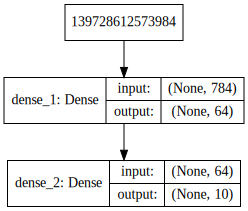

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [4]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')
